|   Attribute  |  Description  |
|:--------------|:--------------|
|   **Diagnosis**  | ICD-10 codes for primary and secondary as well multiple tumors if any |
|   **FVC**  | Amount of air which can be forcibly exhaled from the lungs after taking the deepest breath possible |
|   **FEV1**  | Volume that has been exhaled at the end of the first second of forced expiration |
|   **Performance**  | Performance status on Zubrod scale, Good (0) to Poor (2) |
|   **Pain**  | Pain before surgery (T = 1, F = 0)  |
|   **Haemoptysis**  | Coughing up blood, before surgery (T = 1, F = 0) |
|   **Dyspnoea**  | Difficulty or labored breathing, before surgery (T = 1, F = 0)  |
|   **Cough**  | Symptoms of Coughing, before surgery (T = 1, F = 0)   |
|   **Weakness**  | Weakness, before surgery (T = 1, F = 0)  |
|   **Tumor_Size**  |  T in clinical TNM - size of the original tumor, 1 (smallest) to 4 (largest) |
|   **Diabetes_Mellitus**  | Type 2 diabetes mellitus (T = 1, F = 0)   |
|   **MI_6mo**  | Myocardial infarction (Heart Attack), up to 6 months prior(T = 1, F = 0)   |
|   **PAD**  | Peripheral arterial diseases (T = 1, F = 0)   |
|   **Smoking**  | Patient smoked (T = 1, F = 0)   |
|   **Asthma**  | Patient has asthma (T = 1, F = 0)   |
|   **Age**  | Age at surgery   |
|   **Death_1yr**  | 1 year survival period - (T) value if died (T = 1, F = 0)    |


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('Surgery_Data.csv')

In [3]:
data.head()

,Risk1Yr,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,F,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60
1,F,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51
2,F,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59
3,F,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54
4,T,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73


# Data modification
As the initial data contains string variables only, the following steps will be implemented:

<p> • convert True/False values into intigers 1/0 to treat them as binary variables
<p> • convert string valuses into intigers to treat them as categorical variables
<p> • rename data variables to better reflect their meaning

In [4]:
# converting into binary variables

data[['Risk1Yr', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32']] = \
(data[[ 'Risk1Yr', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32']] == 'T').astype(int)

# converting into categorical variables

data['DGN'] = data.DGN.str[-1:].astype(int)
data['PRE6'] = data.PRE6.str[-1:].astype(int)
data['PRE14'] = data.PRE14.str[-1:].astype(int)

# renaming data variables

col_names = {'Risk1Yr': 'Death_1yr', 'DGN': 'Diagnosis', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Performance', 
            'PRE7': 'Pain', 'PRE8': 'Haemoptysis', 'PRE9': 'Dyspnoea', 'PRE10': 'Cough', 'PRE11': 'Weakness',
            'PRE14': 'Tumor_Size', 'PRE17': 'Diabetes_Mellitus', 'PRE19': 'MI_6mo', 'PRE25': 'PAD',
            'PRE30': 'Smoking', 'PRE32': 'Asthma', 'AGE': 'Age'}
data = data.rename(index=str, columns=col_names)

In [5]:
data.head()

,Death_1yr,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
0,0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60
1,0,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51
2,0,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59
3,0,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54
4,1,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73


# Data Description

In [6]:
data.describe()

,Death_1yr,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,0.148620,3.095541,3.284692,4.566561,0.779193,0.065817,0.144374,0.065817,0.685775,0.165605,1.736730,0.074310,0.004246,0.016985,0.821656,0.004246,62.509554
std,0.356092,0.721554,0.872987,11.755423,0.536014,0.248226,0.351842,0.248226,0.464700,0.372121,0.701601,0.262554,0.065094,0.129353,0.383209,0.065094,8.713856
min,0.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,0.000000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000
50%,0.000000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000
75%,0.000000,3.000000,3.825000,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000
max,1.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000


There are only 3 numeric variables in the data, namely Age, FEV1 and FVC/ The distribution of each one has to be observed in orger to get outliers.

	  Distribution of numeric variables


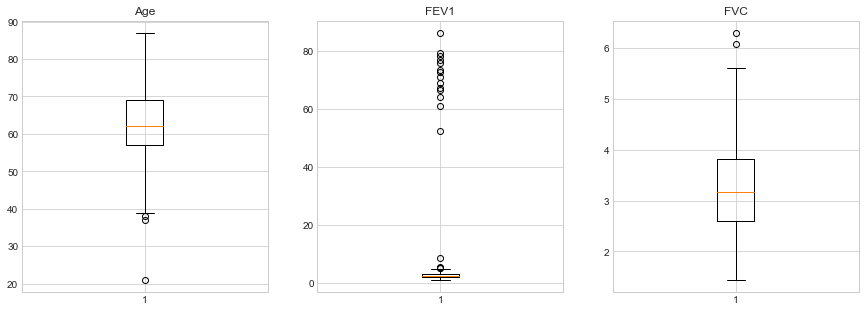

In [7]:
print('\t \033[1m Distribution of numeric variables')

fig, axs = plt.subplots(1,3,  figsize=(15,5))

axs[0].boxplot(data.Age)
axs[0].set_title('Age')

axs[1].boxplot(data.FEV1)
axs[1].set_title('FEV1')

axs[2].boxplot(data.FVC)
axs[2].set_title("FVC")
plt.show()

                                            Finding outliers in the data                                            


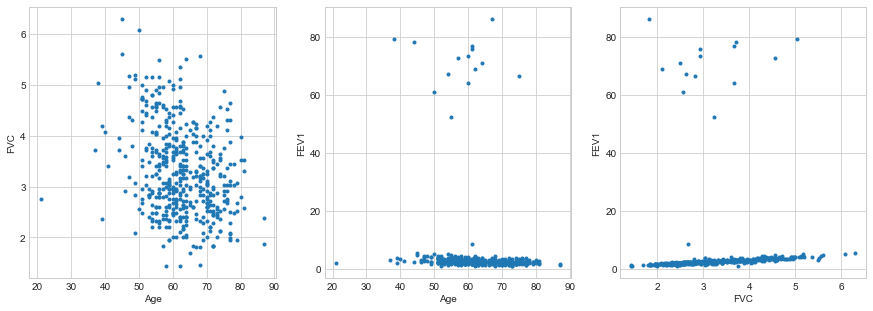

In [8]:
print('\033[1m Finding outliers in the data'.center(120))

fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].plot(data.Age, data.FVC, linestyle='none', marker='.')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('FVC')

axs[1].plot(data.Age, data.FEV1, linestyle='none', marker='.')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('FEV1')

axs[2].plot(data.FVC, data.FEV1, linestyle='none', marker='.')
axs[2].set_xlabel('FVC')
axs[2].set_ylabel('FEV1')

plt.show()

<p> The individual distributions of variables can be seen using following cods: `sns.distplot(data.AGE)` and `sns.distplot(data.FEV1)`
<p> As shown in the plots above, there are outliers in Age and FEV1 variables. Latter need to be excluded from the preserved data considering the possible misleading effect they can bring into the final results.

In [9]:
df = data[data.Age > 30]
df = data[data.FEV1 < 8]

print('The original data contains \033[1m' + str(len(data)) + '\033[0m observations, while after the applied changes there are \033[1m' + str(len(df)) + '\033[0m left.')

data=df

The original data contains 471 observations, while after the applied changes there are 456 left.


	  Distribution of numeric variables after the cleaning


C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


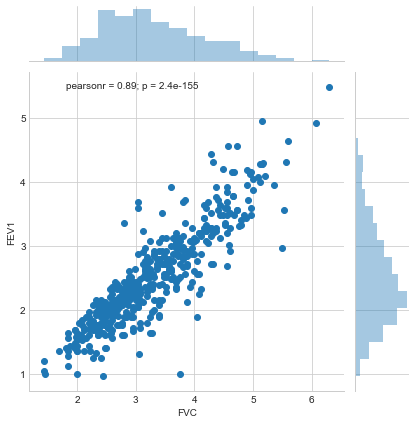

In [10]:
print('\t \033[1m Distribution of numeric variables after the cleaning')
sns.jointplot(x='FVC', y='FEV1', data=data);

# Statistics_Main

Now when the outliers have been dismissed, let's dig deeper through the basic statistics and visualize connections between variables.

In [11]:
# Stats for live and death after 1 yr patients
var = data.columns[2:]

survive = data[data['Death_1yr'] == 0]
die = data[data['Death_1yr'] == 1]

survive_mean = [np.mean(survive[i]) for i in var]
die_mean = [np.mean(die[i]) for i in var]

separate_data = pd.DataFrame(data={'Variable': var, 'survival': survive_mean, 'death': die_mean}).set_index('Variable')

print('These are the mean values of each variable for \033[1m' + str(len(survive)) + '\033[0m survived and \033[1m'+ str(len(die)) + '\033[0m died individuals.')

separate_data

These are the mean values of each variable for 387 survived and 69 died individuals.


,survival,death
Variable,,
FVC,3.306848,3.195072
FEV1,2.542248,2.383188
Performance,0.770026,0.913043
Pain,0.051680,0.101449
Haemoptysis,0.124031,0.202899
Dyspnoea,0.043928,0.115942
Cough,0.674419,0.797101
Weakness,0.157623,0.246377
Tumor_Size,1.684755,2.014493


	  Number of Deaths


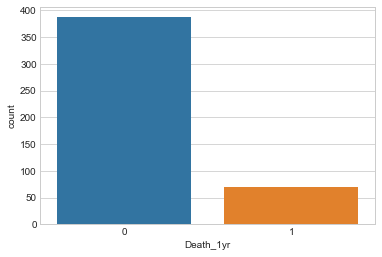

In [12]:
print('\t \033[1m Number of Deaths')
sns.countplot(x="Death_1yr", data=data);

<p> Out of the 456 patients, 69 did not survive in the first year of their operations, which is 15.13% of the whole data.
    
<p> Thus, the overall picture of only one year post-operational observation for each patient showes that received survival results are quite high. It makes the data imbalanced, however, before turning to that particular point, let's first examin survival rates per individual features.
    
<p> Looking at the means of the two different patient classes, there are features with significant differences and those with minor. However, just looking at the numbers without appropriately weighting them makes comparison difficult. Therefore, the mean differences between died and survived people after 1 year of surgery will be observed together with the frequency of dummy conditions recorded within patients before the surgery.

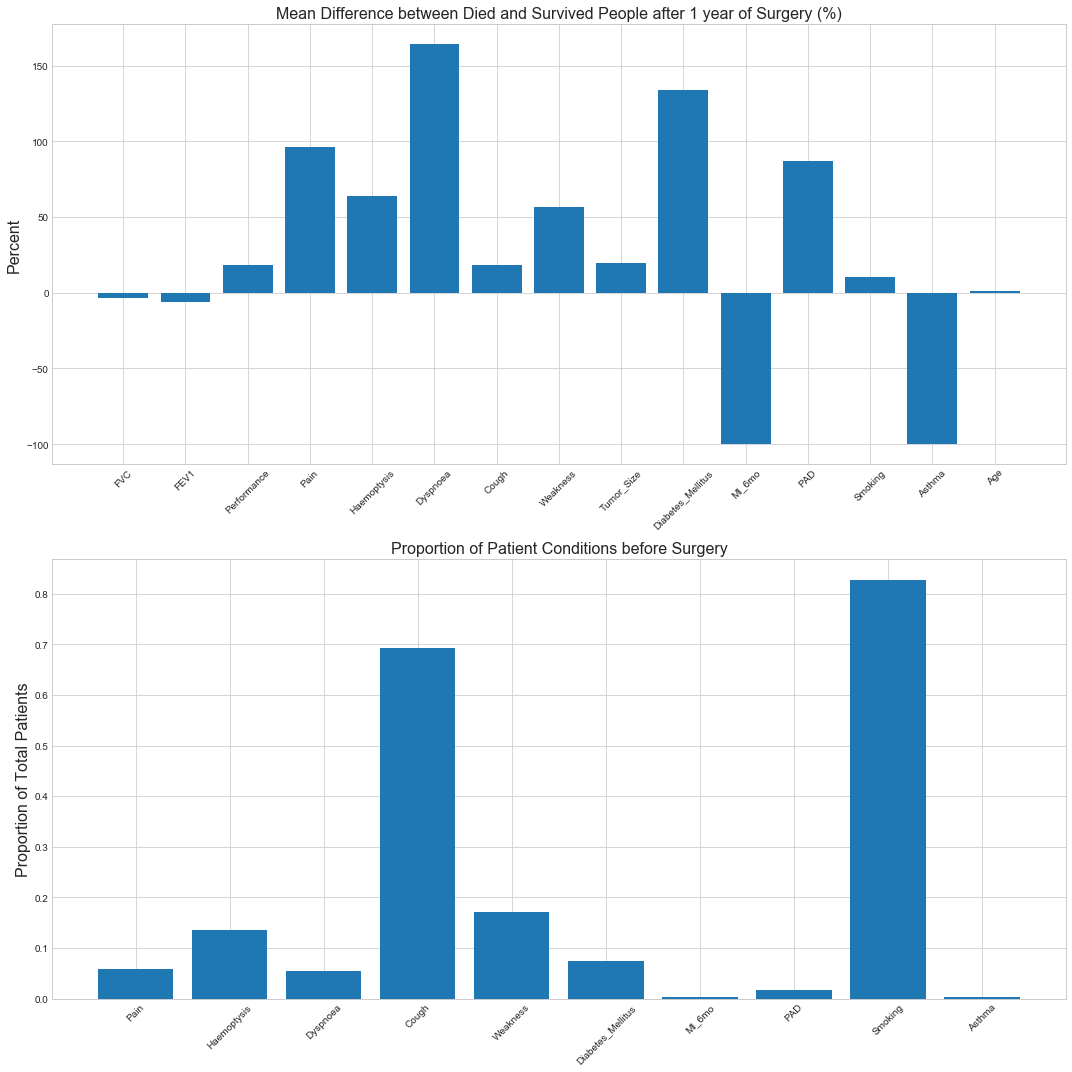

In [13]:
# Percentage difference in means of live vs death patients
survive = np.array(survive_mean)
die = np.array(die_mean)

perc_diff = (die-survive)/survive*100

fig, axs = plt.subplots(2, 1, figsize=(15, 15))

# Mean difference between Died and Survived people after 1 year of surgery (%)
axs[0].bar(var, perc_diff)
axs[0].set_title('Mean Difference between Died and Survived People after 1 year of Surgery (%)', fontsize=16)
axs[0].set_xticks(var)
axs[0].set_xticklabels(var, rotation=45)
axs[0].set_ylabel('Percent', fontsize=16)

# Plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma']
tf_sum = [data[i].sum()/456 for i in tf_col]

axs[1].bar(tf_col, tf_sum)
axs[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=16)
axs[1].set_xticks(tf_col)
axs[1].set_xticklabels(tf_col, rotation=45)
axs[1].set_ylabel('Proportion of Total Patients', fontsize=16)

plt.tight_layout()

plt.show()

<p> Looking at the first graph, we can highlight *Dyspnoea*, *Diabetes Mellitus*, *Pain*, *PAD*, and *Haemoptysis* to be strongly presented as notable attributes for those who died. Asthma or MI symptoms are shown only within the survived individuals which explains the negative 100% values of *Asthma* and *MI of 6 months* variables.

<p> The number of instances of each attribute in combination with the mean differences, in fact, emphasises the importance of it, supporting the feature choosing a decision. In addition to this, the overall count should be considered when comparing mean differences because the lower count numbers will have larger fluctuations to small differences. 

<p> The most noteworthy evidence of these are the proportional values of *Cough* and *Smoking* showing a strong correlation to those patients applicable for getting a thoracic surgery for lung cancer, but the mean differences are a small positive value indicating less representation in the dead patients. 

# Statistics_Numeric

<p> The plots below will further investigate the relationship between three numerical data variables.

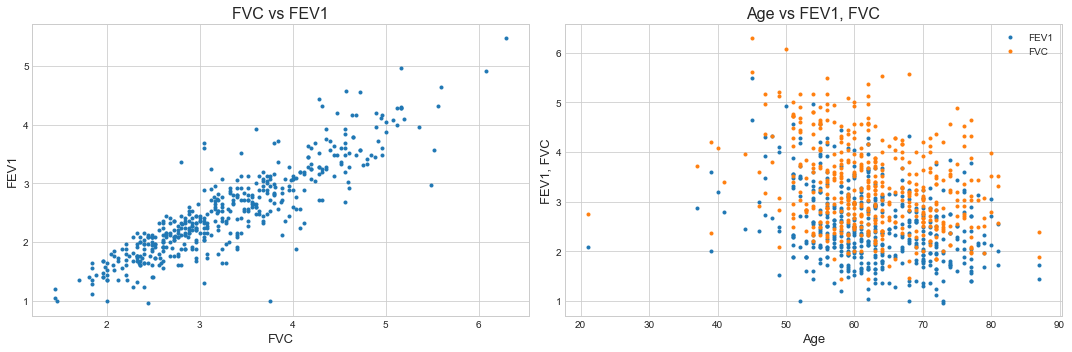

In [14]:
# Scatter plot for FVC, FEV1, Age columns

fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(data.FVC, df.FEV1, linestyle='none', marker='.')
axs[0].set_title('FVC vs FEV1', fontsize=16)
axs[0].set_xlabel('FVC', fontsize=13)
axs[0].set_ylabel('FEV1', fontsize=13)

axs[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axs[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axs[1].set_title('Age vs FEV1, FVC', fontsize=16)
axs[1].set_xlabel('Age', fontsize=13)
axs[1].set_ylabel('FEV1, FVC', fontsize=13)
axs[1].legend()

plt.tight_layout()

plt.show()

In [15]:
print('\n \033[0m Correlation coefficient for FVC and FEV1 is: \n \033[1m' + str(np.corrcoef(df.FVC, df.FEV1)[0,1]))

print('\n \033[0m Correlation coefficient for Age and FVC is: \n \033[1m' + str(np.corrcoef(df.Age, df.FVC)[0,1]))

print('\n \033[0m Correlation coefficient for Age and FEV1 is: \n \033[1m' + str(np.corrcoef(df.Age, df.FEV1)[0,1]))


  Correlation coefficient for FVC and FEV1 is: 
 0.8880940209183817

  Correlation coefficient for Age and FVC is: 
 -0.2885838515435204

  Correlation coefficient for Age and FEV1 is: 
 -0.2983102992508119


<p> From looking at the graphs, one can see a strong positive correlation between FVC and FEV1, while Age has a slight negative trend in the graphs. The correlation coefficient calculated for FVC and FEV1 is *0.89*, which is very strong on top of the fact that the data points are grouped together to show a visible linear trend. On the other hand, Age's correlation with FVC and FEV1 are about *-0.3* for both, but the data points are more spread out. The mild negative trend for age against the other two features makes intuitive sense as it would be expected that as you get older, your lung capacity decreases.

# Statistics_Categorical
<p> There are three categorical variables available in the data to be observed for intimating the number of deaths each one caused.

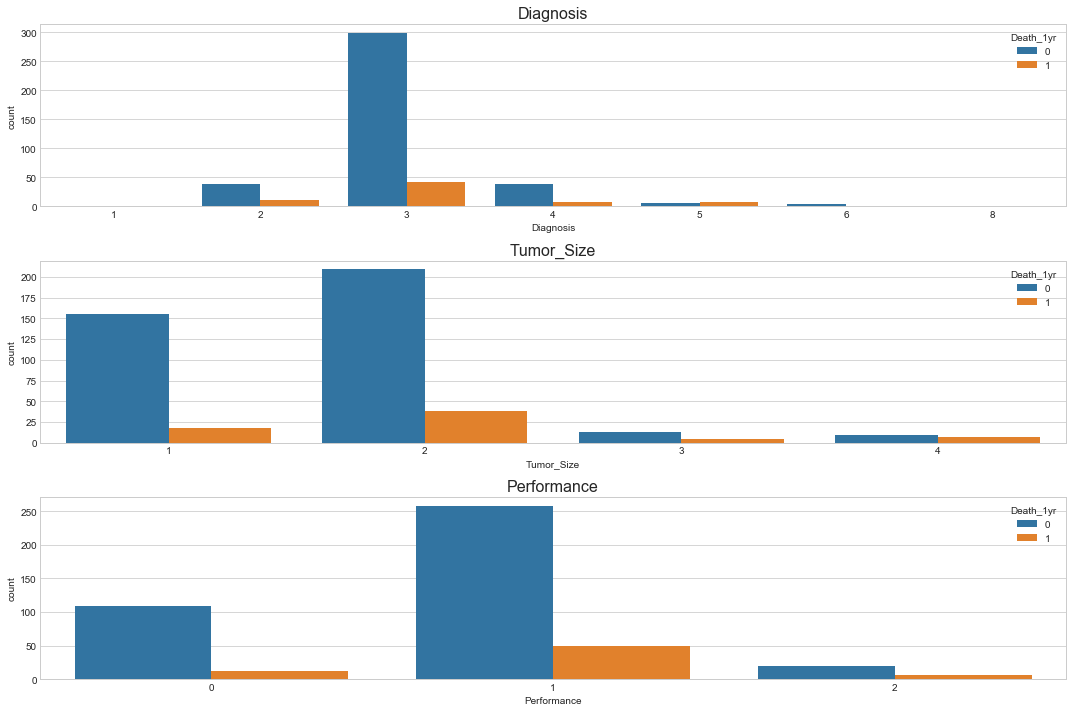

In [16]:
# Plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axs = plt.subplots(3,1,figsize=(15,10))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=data, ax=axs[0]).set_title('Diagnosis', fontsize=16)
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=data, ax=axs[1]).set_title('Tumor_Size', fontsize=16)
sns.countplot(x='Performance', hue='Death_1yr', data=data, ax=axs[2]).set_title('Performance', fontsize=16)

plt.tight_layout()

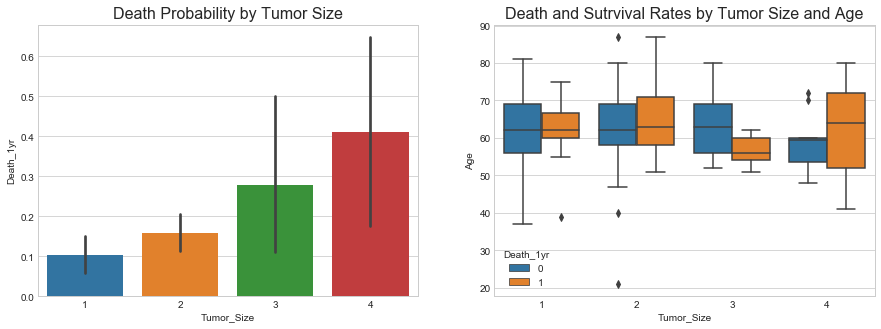

In [17]:
f, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(x='Tumor_Size',y='Death_1yr', data=data,  orient='v' , ax=axes[0]).set_title('Death Probability by Tumor Size', fontsize=16);
sns.boxplot(x="Tumor_Size", y="Age", hue='Death_1yr', data=data,  orient='v' , ax=axes[1]).set_title('Death and Sutrvival Rates by Tumor Size and Age', fontsize=16);


<p> The biger the tumor size, the higher is the probability of a person to die after 1 year of having a surgery.
<p> Another indicator of survival can be presented by age and tumor size. Here, however, the probability of death rate differes between the variables.

# Modeling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

import itertools
import time

All attributes but target variable *Death_1yr, also Asthma, and MI_6mo* that had -100% Mean Difference value, will be excluded from X. Latter will be splitted into train and test sets for further use.

In [19]:
X = data.drop(['Death_1yr', 'MI_6mo', 'Asthma'], axis=1)

y = data['Death_1yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [20]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    plt.show()   

In [21]:
def train(model, title, weight):

    clf = model(class_weight=weight)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    
    auc = roc_auc_score(y_train, y_pred)

    class_names = ['Survived', 'Died']

    print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
    print('Average Precision: {:.2f}'.format(average_precision_score(y_train, y_pred)))
    print('AUC: %.3f' % auc)
    print(classification_report(y_train, y_pred, target_names=class_names))

    cnf_matrix = confusion_matrix(y_train, y_pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    plt.show()

Accuracy Score: 0.85
Average Precision: 0.18
AUC: 0.531
             precision    recall  f1-score   support

   Survived       0.85      0.99      0.92       308
       Died       0.57      0.07      0.13        56

avg / total       0.81      0.85      0.80       364



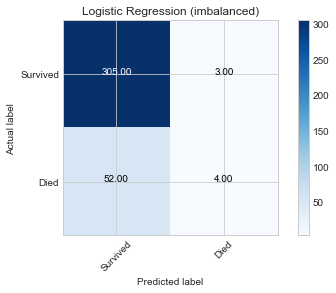

In [22]:
train(LogisticRegression, 'Logistic Regression (imbalanced)', '')

In [23]:
print('Specificity: ' + str(308/(308+2)))

Specificity: 0.9935483870967742


Accuracy Score: 0.70
Average Precision: 0.26
AUC: 0.703
             precision    recall  f1-score   support

   Survived       0.93      0.69      0.79       308
       Died       0.30      0.71      0.42        56

avg / total       0.83      0.70      0.74       364



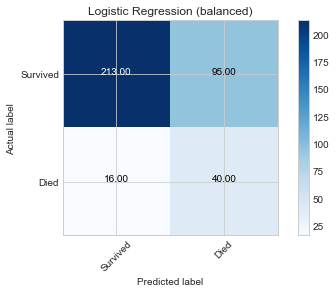

In [24]:
train(LogisticRegression, 'Logistic Regression (balanced)', 'balanced')

In [25]:
print('Specificity: ' + str(213/(213+97)))

Specificity: 0.6870967741935484


Accuracy Score: 0.97
Average Precision: 0.85
AUC: 0.911
             precision    recall  f1-score   support

   Survived       0.97      1.00      0.98       308
       Died       1.00      0.82      0.90        56

avg / total       0.97      0.97      0.97       364



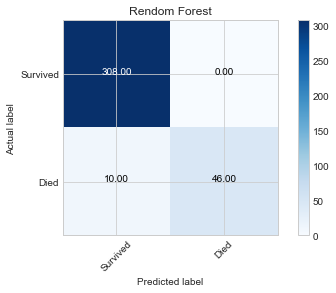

In [26]:
train(RandomForestClassifier, 'Rendom Forest', 'balanced')

In [27]:
print('Specificity: ' + str(310/(310+0)))

Specificity: 1.0


In [28]:
def testing(model, title, weight):

    clf = model(class_weight=weight)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    auc = roc_auc_score(y_test, y_pred)
    
    class_names = ['Survived', 'Died']
    
    print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
    print('AUC: %.3f' % auc)
    print(classification_report(y_test, y_pred, target_names=class_names))

    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    
    plt.show()

Accuracy Score: 0.85
Average Precision: 0.14
AUC: 0.494
             precision    recall  f1-score   support

   Survived       0.86      0.99      0.92        79
       Died       0.00      0.00      0.00        13

avg / total       0.74      0.85      0.79        92



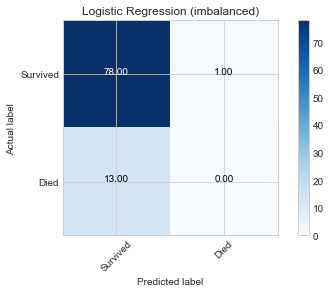

In [29]:
testing(LogisticRegression, 'Logistic Regression (imbalanced)', '')

In [30]:
print('Specificity: ' + str(81/(81+0)))

Specificity: 1.0


Accuracy Score: 0.65
Average Precision: 0.18
AUC: 0.605
             precision    recall  f1-score   support

   Survived       0.90      0.67      0.77        79
       Died       0.21      0.54      0.30        13

avg / total       0.80      0.65      0.70        92



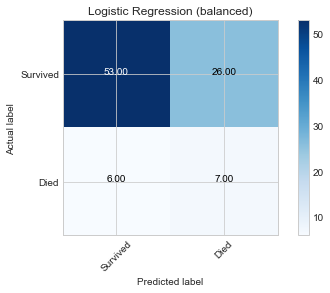

In [31]:
testing(LogisticRegression, 'Logistic Regression (balanced)', 'balanced')

In [32]:
print('Specificity: ' + str(51/(51+30)))

Specificity: 0.6296296296296297


Accuracy Score: 0.86
Average Precision: 0.14
AUC: 0.500
             precision    recall  f1-score   support

   Survived       0.86      1.00      0.92        79
       Died       0.00      0.00      0.00        13

avg / total       0.74      0.86      0.79        92



C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


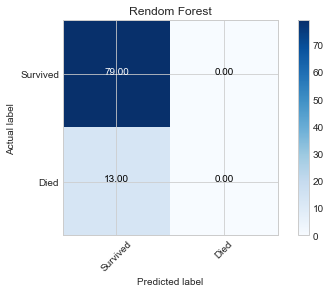

In [33]:
testing(RandomForestClassifier, 'Rendom Forest', 'balanced')

In [34]:
print('Specificity: ' + str(80/(80+1)))

Specificity: 0.9876543209876543


In [35]:
clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

Accuracy: 76.09%


In [36]:
clf = GaussianNB()
clf.fit(X_test, y_test)
prediction = clf.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

Accuracy: 33.70%


# Summary

|   Attribute  |  LogReg (imbalanced)  |  LogReg (balanced)  |  RandomForest (balanced)  |
|:--------------|:--------------|
|   **acc_train**  | 0.85 | 0.67 | 0.98 |
|   **avg_prec_train**  | 0.19 | 0.25 | 0.87 |
|   **auc_train**  | 0.531 | 0.692 | 0.92 |
|   **spec_train**  | 0.99 | 0.68 | 1 |
|   **acc_test**  | 0.89 | 0.63 | 0.87 |
|   **avg_prec_test**  | 0.20 | 0.16 | 0.12 |
|   **auc_test**  | 0.545 | 0.633 | 0.494 |
|   **spec_test**  | 1 | 0.63 | 0.98 |